In [270]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [271]:
df = pd.read_csv('File 1.csv')

In [272]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-1.248325,-1.137174,0.277968,0.702952,1.374166
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161
4,1.091959,0.905112,0.064361,1.088081,-0.892193


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  500 non-null    float64
 1   feature_1  500 non-null    float64
 2   feature_2  500 non-null    float64
 3   feature_3  500 non-null    float64
 4   feature_4  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


<Axes: >

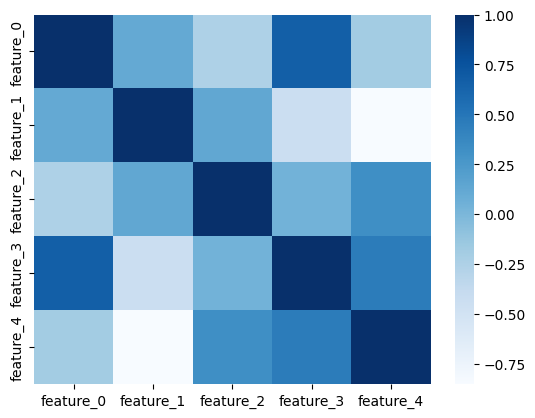

In [274]:
sns.heatmap(df.corr(),cmap='Blues')

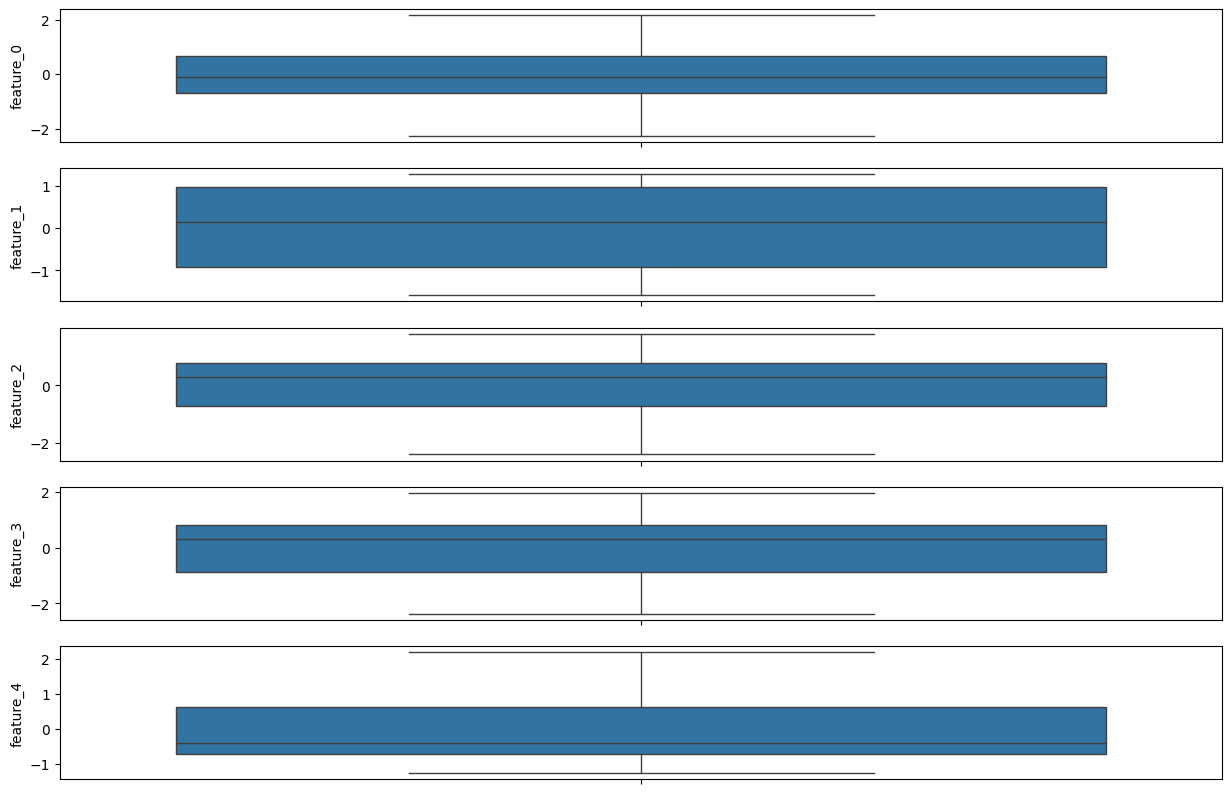

In [275]:
fig , axes = plt.subplots(nrows=5, figsize=(15,10))
axes=axes.flatten()
features = ['feature_0','feature_1','feature_2','feature_3','feature_4']
for i,feature in enumerate(features):
    sns.boxplot(df[feature],ax=axes[i])

In [276]:
scaler = StandardScaler()
for feature in features:
    df[feature]= scaler.fit_transform(df[[feature]])

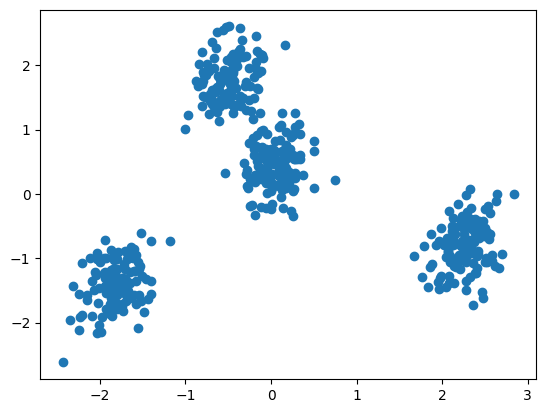

In [277]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_axes = pca.fit_transform(df)
plt.scatter(pca_axes[:,0],pca_axes[:,1])


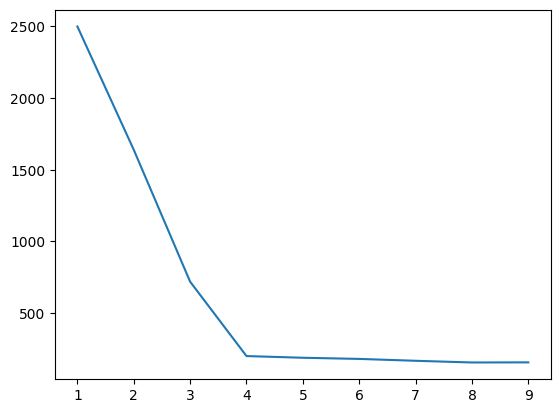

In [278]:
from sklearn.cluster import KMeans
n_clusters = np.arange(1,10)
inertias=[]
for i in n_clusters:
    KM = KMeans(n_clusters=i)
    KM.fit_transform(df)
    inertias.append(KM.inertia_)
plt.plot(n_clusters,inertias)

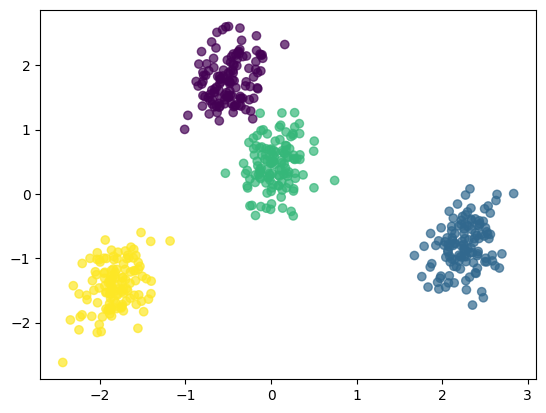

In [279]:
KM=KMeans(n_clusters=4)
label=KM.fit_predict(df)
plt.scatter(pca_axes[:,0],pca_axes[:,1],c=label, cmap="viridis", alpha=0.7)


In [280]:
df['label']=label
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,label
0,-1.248325,-1.137174,0.277968,0.702952,1.374166,1
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038,3
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891,3
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161,3
4,1.091959,0.905112,0.064361,1.088081,-0.892193,0


In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=df.drop('label',axis=1)
for feature in features:
    noise=np.random.normal(0,0.5,X['feature_0'].shape)
    X[feature] = X[feature] + noise
y=df['label']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
pca_test=PCA(n_components=2)
pca_test_data=pca_test.fit_transform(X_test)


In [282]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)

In [285]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)

0.97


array([[24,  0,  1,  0],
       [ 0, 25,  0,  0],
       [ 0,  0, 24,  1],
       [ 1,  0,  0, 24]])

In [286]:
accuracy_score(y_train,rf.predict(X_train))

1.0

In [287]:
df.head(1)

,feature_0,feature_1,feature_2,feature_3,feature_4,label
0,-1.248325,-1.137174,0.277968,0.702952,1.374166,1


In [288]:
def predict_rf(f1,f2,f3,f4,f5):
    return rf.predict([[f1,f2,f3,f4,f5]])
predict_rf(-1.248325,-1.137174,0.277968,0.702952,1.374166)

c:\Users\ziyad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [289]:
user_spending = [0.0, 0.0, 0.0, 13.97, 111.67, 0.0, 29.81, 33.4, 0.0, 7.41, 112.48, 68.86, 42.0, 75.02, 64.17, 0.0, 91.04, 64.38, 0.0, 18.64, 0.0, 44.12, 60.52, 0.0, 61.73, 0.0, 0.0, 12.08, 75.68, 83.61, 0.0, 0.0, 0.0, 36.79, 0.0, 50.61, 85.39, 0.0, 62.38, 60.91, 53.06, 29.62, 87.18, 22.64, 0.0, 0.0, 46.38, 0.0, 33.53, 0.0, 0.0, 0.0, 65.37, 0.0, 0.0, 0.0, 68.79, 0.0, 0.0, 19.46, 45.98, 0.0, 0.0, 13.92, 36.83, 0.0, 0.0, 0.0, 0.0, 68.8, 0.0, 0.0, 39.97, 0.0, 0.0, 65.72, 0.0, 0.0, 0.0, 29.21, 0.0, 72.61, 0.0, 0.0, 39.45, 0.0, 0.0, 0.0, 66.12, 0.0, 0.0, 0.0, 78.83, 0.0, 0.0, 0.0, 36.6, 0.0, 38.32, 52.44, 0.0, 0.0, 0.0, 57.97, 0.0, 51.12, 0.0, 0.0, 0.0, 52.74, 0.0, 0.0, 0.0, 64.61, 0.0, 0.0, 46.43, 0.0, 0.0, 0.0, 68.52, 0.0, 0.0, 0.0, 61.56, 0.0, 0.0, 0.0, 0.0, 36.23, 0.0, 72.45, 0.0, 0.0, 0.0, 62.62, 0.0, 0.0, 0.0, 64.17, 0.0, 0.0, 0.0, 81.31, 0.0, 0.0, 0.0, 72.55, 0.0, 0.0, 0.0, 64.21, 0.0, 0.0, 0.0, 57.04, 0.0, 0.0, 0.0, 84.02, 0.0, 0.0, 0.0, 56.9, 0.0, 0.0, 0.0, 73.72, 0.0, 0.0, 0.0, 62.61, 0.0, 0.0, 0.0, 75.04, 0.0, 0.0, 0.0, 53.08, 0.0, 0.0, 0.0, 72.42, 0.0, 0.0, 0.0, 63.08, 0.0, 0.0, 0.0, 77.5, 0.0, 0.0, 0.0, 57.62, 0.0, 0.0, 0.0, 68.19, 0.0, 0.0, 0.0, 65.43, 0.0, 0.0, 0.0, 71.87, 0.0, 0.0, 0.0, 61.49, 0.0, 0.0, 0.0, 70.91, 0.0, 0.0, 0.0, 62.45, 0.0, 0.0, 0.0, 74.61, 0.0, 0.0, 0.0, 63.92, 0.0, 0.0, 0.0, 75.49, 0.0, 0.0, 0.0, 60.18, 0.0, 0.0, 0.0, 71.62, 0.0, 0.0, 0.0, 59.71, 0.0, 0.0, 0.0, 72.19, 0.0, 0.0, 0.0, 66.23, 0.0, 0.0, 0.0, 73.1, 0.0, 0.0, 0.0, 62.98, 0.0, 0.0, 0.0, 70.42, 0.0, 0.0, 0.0, 65.15, 0.0, 0.0, 0.0, 69.44, 0.0, 0.0, 0.0, 64.83, 0.0, 0.0, 0.0, 70.26, 0.0, 0.0, 0.0, 63.44, 0.0, 0.0, 0.0, 71.31, 0.0, 0.0, 0.0, 62.88, 0.0, 0.0, 0.0, 70.52, 0.0, 0.0, 0.0, 64.28, 0.0, 0.0, 0.0, 71.88, 0.0, 0.0, 0.0, 65.02, 0.0, 0.0, 0.0, 69.7, 0.0, 0.0, 0.0, 64.92, 0.0, 0.0, 0.0, 71.64, 0.0, 0.0, 0.0, 63.55, 0.0, 0.0, 0.0, 70.15, 0.0, 0.0, 0.0, 65.64, 0.0, 0.0, 0.0, 70.94, 0.0, 0.0, 0.0, 64.41, 0.0, 0.0, 0.0, 71.2, 0.0, 0.0, 0.0, 63.9, 0.0, 0.0, 0.0, 70.37, 0.0, 0.0, 0.0, 64.79, 0.0, 0.0, 0.0, 71.11, 0.0, 0.0, 0.0, 64.08, 0.0, 0.0, 0.0, 70.23, 0.0, 0.0, 0.0, 64.54, 0.0, 0.0, 0.0, 71.03, 0.0, 0.0, 0.0, 65.12, 0.0, 0.0, 0.0, 70.91, 0.0, 0.0, 0.0, 64.62, 0.0, 0.0, 0.0, 71.27, 0.0, 0.0, 0.0, 65.01, 0.0, 0.0, 0.0, 70.88, 0.0, 0.0, 0.0, 64.75, 0.0, 0.0, 0.0, 71.05, 0.0, 0.0, 0.0, 65.09, 0.0, 0.0, 0.0, 70.95, 0.0, 0.0, 0.0, 64.66, 0.0, 0.0, 0.0, 71.19, 0.0, 0.0, 0.0, 65.15, 0.0, 0.0, 0.0, 70.92, 0.0, 0.0, 0.0, 64.81, 0.0, 0.0, 0.0, 71.1, 0.0, 0.0, 0.0, 65.04, 0.0, 0.0, 0.0, 71.06, 0.0, 0.0, 0.0, 64.77, 0.0, 0.0, 0.0, 71.14, 0.0, 0.0, 0.0, 65.18, 0.0, 0.0, 0.0, 70.89, 0.0, 0.0, 0.0, 64.9, 0.0, 0.0, 0.0, 71.22, 0.0, 0.0, 0.0, 65.07, 0.0, 0.0, 0.0, 70.98, 0.0, 0.0, 0.0, 64.86, 0.0, 0.0, 0.0, 71.16, 0.0, 0.0, 0.0, 65.11, 0.0, 0.0, 0.0, 70.97, 0.0, 0.0, 0.0, 64.82, 0.0, 0.0, 0.0, 71.12, 0.0, 0.0, 0.0, 65.14, 0.0, 0.0, 0.0, 70.94, 0.0, 0.0, 0.0, 64.87, 0.0, 0.0, 0.0, 71.17]
user_spending=user_spending[0:500]

In [290]:
df['user_spending']=user_spending

In [291]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,label,user_spending
0,-1.248325,-1.137174,0.277968,0.702952,1.374166,1,0.00
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038,3,0.00
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891,3,0.00
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161,3,13.97
4,1.091959,0.905112,0.064361,1.088081,-0.892193,0,111.67


In [292]:
from sklearn.linear_model import LinearRegression
X = df.drop('user_spending',axis=1)
y=df['user_spending']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [293]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [294]:
from sklearn.metrics import root_mean_squared_error ,r2_score
root_mean_squared_error(y_test,pred)

27.68172112362825

In [295]:
r2_score(y_test,pred)

-0.0371532954920355

<Axes: >

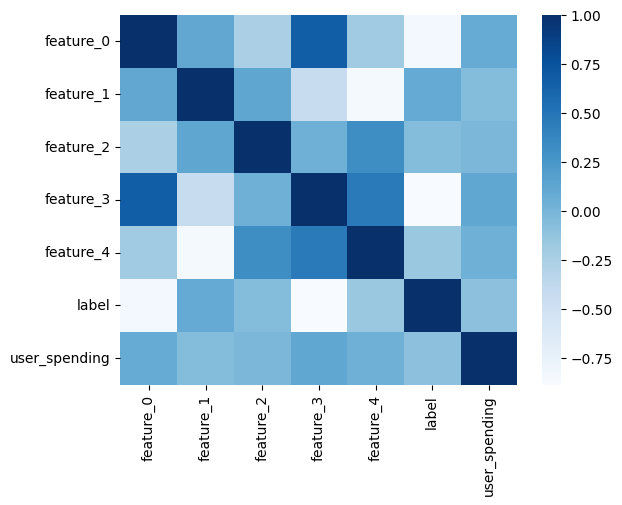

In [297]:
sns.heatmap(df.corr(),cmap='Blues')